<a href="https://colab.research.google.com/github/Saadaalrahbi/cancer_risk_prediction/blob/main/Cancer_Risk_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
#Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant (Cancer), 1 = Benign (No Cancer)

In [ ]:
# Check for missing values
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# Encode target variable (0 = Cancer, 1 = No Cancer)
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [ ]:
# Split into features and target
X = df.drop(columns=['target'])
y = df['target']

In [ ]:
# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Training Multiple models and compare them

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

In [ ]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1, auc])

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.982456   0.986111  0.986111  0.986111  0.981151
1        Random Forest  0.956140   0.958904  0.972222  0.965517  0.950397
2              XGBoost  0.947368   0.945946  0.972222  0.958904  0.938492


In [ ]:
# Model performance visualization

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

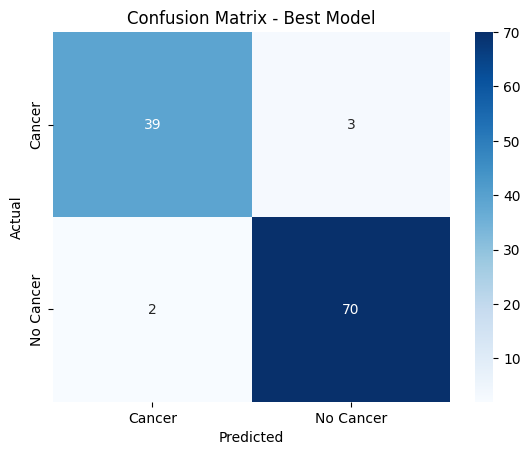

In [ ]:
# Ploting Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Cancer", "No Cancer"], yticklabels=["Cancer", "No Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()

In [ ]:
#Predicting cancer for new patient

In [ ]:
def predict_cancer_risk(model, patient_data):
    """
    Predicts cancer risk for a new patient.
    patient_data: List of 30 numerical values corresponding to features.
    """
    patient_data = pd.DataFrame(data=[patient_data], columns=X.columns)  # Using X.columns for feature names
    patient_data = scaler.transform(patient_data)  # Apply the same scaling
    prediction = model.predict(patient_data)[0]

    if prediction == 0:
        return "High Cancer Risk (Malignant)"
    else:
        return "Low Cancer Risk (Benign)"

In [ ]:
# Example patient (randomized feature values from dataset)
new_patient = X_test[0]
prediction = predict_cancer_risk(best_model, new_patient)
print(f"Prediction for new patient: {prediction}")

Prediction for new patient: Low Cancer Risk (Benign)


In [ ]:
!pip install streamlit pandas numpy scikit-learn xgboost

In [ ]:
!pip install streamlit==1.28.1
!pip install pyngrok==6.0.0
import streamlit as st
from pyngrok import ngrok

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
# Defining the script content
script = """
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset for feature scaling
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Standardize features (fit on the training data)
scaler = StandardScaler()
scaler.fit(df)  # Fit scaler on the original dataset

# Train model (just an example of how you can fit the model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(scaler.transform(df), data.target)  # Use scaled data to train

# Function to make predictions
def predict_cancer_risk(model, patient_data):
    \"\"\"
Predicts cancer risk for a new patient.
patient_data: List of 30 numerical values corresponding to features.
    \"\"\"
    patient_data = np.array(patient_data).reshape(1, -1)  # Ensure it's in the right shape
    patient_data_scaled = scaler.transform(patient_data)  # Apply scaling
    prediction = model.predict(patient_data_scaled)[0]

    if prediction == 0:
        return "High Cancer Risk (Malignant)"
    else:
        return "Low Cancer Risk (Benign)"


# Streamlit interface
st.title("Breast Cancer Prediction")

# User input form
input_data = []
for feature in df.columns:
    value = st.number_input(f"Enter value for {feature}", min_value=0.0, max_value=100.0, step=0.1)
    input_data.append(value)

# Prediction button
if st.button("Predict Cancer Risk"):
    prediction = predict_cancer_risk(model, input_data)
    st.write(f"**Prediction: {prediction}**")
"""

# Save the script to a file
with open("/content/app.py", "w") as file:
    file.write(script)

print("Script saved as app.py")

Script saved as app.py


In [ ]:
from google.colab import files
files.download("/content/app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>